## steps to build a machine learning Model

1. Get the data 

    methods to fetch data from different sources like SQL databases, Web scrapping, Data warehouses
2. Define Objective and study domain

    type of problem, performance Goal, Domain knowledge to do EDA and feature selection
    
3. Data modeling

    processing and transforming data according to ML model, coverting data into 2d Array
    
4. Training machine learning model

    we try to train various model on the training data and then we select few models which are performing well 
    
5. optimization of machine learning model by evaluation 
    
    hyper parameter tunning of each model we have selected to make it performance even better 
  
6. deploying and monitoring a machine learning model 
    integrate machine learning with real world appliaction and check it's performance over the period of time and make
    adjustment like retraining

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# get the data 
def get_dataset(name):
    df = sns.load_dataset(name)  # load data set from seaborn library
    return df

In [3]:
mpg = get_dataset("mpg")
tip = get_dataset("tips")

In [4]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tip.isna()  # isna() function is used to count the total no of missing values

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [6]:
tip.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

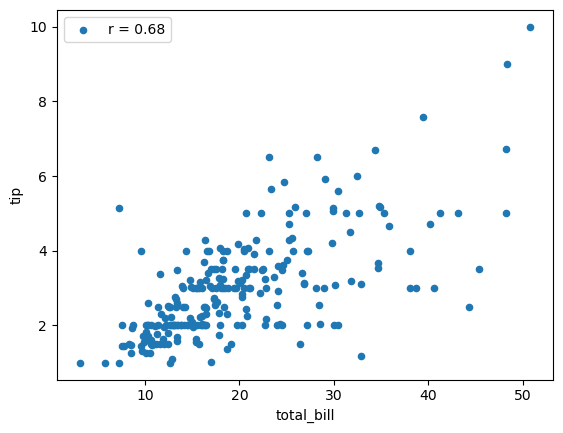

In [7]:
 r = np.corrcoef(tip["total_bill"], tip["tip"])[0,1]
tip.plot(kind = "scatter", x = "total_bill", y = "tip", label = f"r = {r:.2f}")
plt.legend()
plt.show()

### sklearn is a machine learning libarary which has some common machine learning algos

In [8]:
from sklearn.linear_model import LinearRegression  # from sklearn import linearRegression algo
from sklearn.metrics import r2_score  # this lib is used to check the accruarcy of the predicted value 

model = LinearRegression()  # "model" is one object to store linearRegression

x = tip[["total_bill"]]  # features -> 2D Array / dataframe numerical(data should be converted to numerical 
    #form from categorical or text or 
    # any other form ) 
y = tip["tip"]  # y axis can be of any form 

model.fit(x, y)  # learning -> m, c -> y = mx + c, mse = (y-y_hat)^2 /N
#  in mode.fit() function we are giving the training data and on the basis of that m and c are predicted which are called the parameters


print("Coef", model.coef_)
print("Intercept", model.intercept_)

y_hat = model.predict(x)  # y_hat is the predicted value of the model and y is the actual value 


print(f"Accurracy:{r2_score(y, y_hat)*100:.2f}")



Coef [0.10502452]
Intercept 0.9202696135546735
Accurracy:45.66


In [9]:
a1 = pd.DataFrame({
    "name":["Sachin", "Rajat", "Nidhi"],
    "salary":[50000, 60000, 40000],
    "age":[27, 34, 30]
})
a2 =  pd.DataFrame({
    "name":["kushal", "yavendra", "ravi"],
    "salary":[70000, 30000, 45000],
    "age":[29, 27, 26]
})
a3 =  pd.DataFrame({
    "name":["simran", "shivani", "deepratan"],
    "salary":[50000, 60000, 80000],
    "age":[30, 24, 28]
})

In [10]:
a1

,name,salary,age
0,Sachin,50000,27
1,Rajat,60000,34
2,Nidhi,40000,30


In [11]:
a2

,name,salary,age
0,kushal,70000,29
1,yavendra,30000,27
2,ravi,45000,26


In [12]:
a3

,name,salary,age
0,simran,50000,30
1,shivani,60000,24
2,deepratan,80000,28


In [13]:
pd.concat([a1, a2, a3], axis = 0)  # merging two or more data set

,name,salary,age
0,Sachin,50000,27
1,Rajat,60000,34
2,Nidhi,40000,30
0,kushal,70000,29
1,yavendra,30000,27
2,ravi,45000,26
0,simran,50000,30
1,shivani,60000,24
2,deepratan,80000,28


In [14]:
ids = [1001, 1002, 1003, 1004, 1005]

info = pd.DataFrame({
    "name": ["john", "natasha","Harry", "alice", "bob"],
    "city": ["jaipur", "delhi", "mumbai", "kota", "jaipur"],
    "age": [20, 21, 22, 19, 18]
},
index = [1001, 1002, 1003, 1004, 1005])

marks = pd.DataFrame({
    "maths":[50, 60, 70 , 60, 80],
    "chemistry":[80, 70, 90, 50, 70],
    "physics":[56, 87, 98, 67, 90]
}, index = [1004, 1001, 1005, 1002, 1003])

In [15]:
info

,name,city,age
1001,john,jaipur,20
1002,natasha,delhi,21
1003,Harry,mumbai,22
1004,alice,kota,19
1005,bob,jaipur,18


In [16]:
marks

,maths,chemistry,physics
1004,50,80,56
1001,60,70,87
1005,70,90,98
1002,60,50,67
1003,80,70,90


In [17]:
pd.concat([info, marks], axis=1)

,name,city,age,maths,chemistry,physics
1001,john,jaipur,20,60,70,87
1002,natasha,delhi,21,60,50,67
1003,Harry,mumbai,22,80,70,90
1004,alice,kota,19,50,80,56
1005,bob,jaipur,18,70,90,98


In [18]:
mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


### objective - we want to predict mpg on the basis of all factors given in data set
 
 This is a supervise regression problem because input and output are already given
 

### linear regression mpg = b + w1*cylinder + w2*displcement + w3*horsepower +
### w4*weight + w5*acceleration + w6+ model_year + w7*origin + w8*name

cylinder, horsepower, model_year are categorical data

displacement, wight are numerical data

origin and name are objects 

## sampling of data

 considering only some part of whole data set for study 